In [22]:
import json
from pprint import pprint
import pandas as pd 
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import load_files

In [3]:
with open('rating_avengerendgame.json') as data_file:
    data = json.load(data_file)

In [155]:
with open('rating_captainmarvel.json') as data_file_2:
    data_2 = json.load(data_file_2)

In [4]:
data

[{'names': 'raudafitriani',
  'title': " An experience you'll gonna remember forever.\n",
  'ratings': '10',
  'review_text': "There is no way that I could describe my emotions for this movie. I'm totally speechless. I haven't laughed (even cried) this much in Marvel movie or even in any movie. I'm fully on my emotion, there are so many tears of joy and loss. Amazing story, the acting is outstanding, epic action, great CGI, the best storytelling ever told in a superhero movie, amazing performance. I love it more than 3000."},
 {'names': 'ahmetkozan',
  'title': ' The End of an Era!\n',
  'ratings': '10',
  'review_text': "Happiness, sadness, pure joy, excitement... I'm gonna miss this moment in my whole life because let's face it- it's been awhile movies can bring such a big enthusiasm like this."},
 {'names': 'larshoeijmans',
  'title': ' The ending made all 22 movies worth it\n',
  'ratings': '10',
  'review_text': "It is such an experience you'll gonna remember it forever. People ar

In [156]:
data_total = data + data_2

In [159]:
ratings = [eval(elem['ratings']) for elem in data_total]
reviews = [elem['review_text'] for elem in data_total]

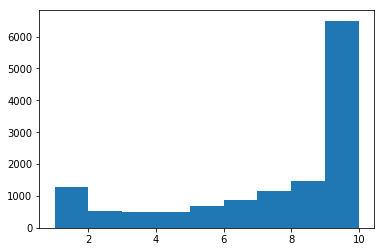

In [160]:
plt.hist(ratings, bins=np.arange(min(ratings), max(ratings) + 1))
plt.show()

In [161]:
df = pd.DataFrame({'rating':ratings, 'review': reviews})

In [524]:
df['type'] = df['rating'].apply(lambda x: 1 if x > 5 else 0) # greater than 5 -> positive, otherwise -> negative

In [525]:
y = np.array(df['type'].tolist())

In [526]:
corpus = df['review'].tolist()

In [527]:
# Creating the Tf-Idf model directly
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=4000, min_df=3, max_df=0.6, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(corpus).toarray()

In [528]:
print(X.shape)
print(y.shape)

(13469, 4000)
(13469,)


In [529]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
text_train, text_test, sent_train, sent_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [530]:
print(text_train.shape)
print(sent_train.shape)
print(text_test.shape)
print(sent_test.shape)

(10775, 4000)
(10775,)
(2694, 4000)
(2694,)


In [531]:
sent_train_nn = sent_train.reshape(sent_train.size, 1)
sent_test_nn = sent_test.reshape(sent_test.size, 1)

In [532]:
print(sent_train_nn.shape)
print(sent_test_nn.shape)

(10775, 1)
(2694, 1)


In [533]:
# Training the classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs')
classifier.fit(text_train,sent_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [534]:
# Testing model performance
sent_pred = classifier.predict(text_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(sent_test, sent_pred)
accuracy_score(sent_pred, sent_test, normalize=True)

0.7839643652561247

In [535]:
# Using LinearSVC
from sklearn.svm import LinearSVC
classifier_linearSVC = LinearSVC(C=0.1)
classifier_linearSVC.fit(text_train, sent_train)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [536]:
# Testing model performance
sent_pred_LinearSVC = classifier_linearSVC.predict(text_test)
confusion_matrix(sent_test, sent_pred_LinearSVC)
accuracy_score(sent_pred_LinearSVC, sent_test, normalize=True)

0.7828507795100222

In [537]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

In [540]:
batch_size = 32
epochs = 12

In [544]:
model = Sequential()
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(
    text_train,
    sent_train_nn,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(text_test, sent_test_nn),
)
score = model.evaluate(text_test, sent_test_nn, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Train on 10775 samples, validate on 2694 samples
Epoch 1/12
10775/10775 [==============================] - 2s 176us/step - loss: 0.5597 - acc: 0.7409 - val_loss: 0.5142 - val_acc: 0.7524
Epoch 2/12
10775/10775 [==============================] - 1s 86us/step - loss: 0.4799 - acc: 0.7673 - val_loss: 0.4827 - val_acc: 0.7739
Epoch 3/12
10775/10775 [==============================] - 1s 86us/step - loss: 0.4417 - acc: 0.7941 - val_loss: 0.4826 - val_acc: 0.7751
Epoch 4/12
10775/10775 [==============================] - 1s 87us/step - loss: 0.4224 - acc: 0.8080 - val_loss: 0.4885 - val_acc: 0.7769
Epoch 5/12
10775/10775 [==============================] - 1s 88us/step - loss: 0.4092 - acc: 0.8141 - val_loss: 0.4954 - val_acc: 0.7687
Epoch 6/12
10775/10775 [==============================] - 1s 87us/step - loss: 0.3987 - acc: 0.8208 - val_loss: 0.4999 - val_acc: 0.7650
Epoch 7/12
10775/10775 [==============================] - 1s 87us/step - loss: 0.3875 - acc: 0.8255 - val_loss: 0.5063 - val_acc